# EDA Restaurant Reviews


Using Python 3.13

Using this for an inital look at the data and to play around with it.
We can grab more datasets too

In [1]:
from text_data_toolkit import data_cleaning as clean
from text_data_toolkit import data_transformation as transform
from text_data_toolkit import eda
import seaborn as sns
import matplotlib.pyplot as plt

Space for File Operations


# Here lies an example of the data cleaning modules


In [2]:
files = ['../data/Restaurant_Reviews_Test.tsv',
         '../data/Restaurant_Reviews.csv',
         '../data/Restaurant_Reviews2.txt']


dfs = clean.load_text_to_df(files, columns = ["Review", "Like"], line_length = 2)

In [3]:
df_csv = dfs['Restaurant_Reviews']
df_csv.head()

,Review,Like
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df_txt = dfs['Restaurant_Reviews2']
df_txt = df_txt.drop(0)
df_txt.head()

,Review,Like
1,Wow... Loved this place.,1
2,Crust is not good.,0
3,Not tasty and the texture was just nasty.,0
4,Stopped by during the late May bank holiday of...,1
5,The selection on the menu was great and so wer...,1


In [5]:
df_tsv = dfs['Restaurant_Reviews_Test']
df_tsv.head()

,Review,Like
0,Wow... Loved this place.,1.0
1,Crust isn't good .,0.0
2,Wow... Loved this place.,1.0
3,"""",NaN
4,Not tasty and the texture was just nasty.,0.0


In [6]:
df_tsv = clean.homogenize_columns(df_tsv)

In [7]:
# Remove Duplicates
df_tsv_remove_dup = clean.remove_duplicates_fuzzy(df_tsv, "review", threshold = 90)
df_tsv_remove_dup.head()

,review,like
0,Wow... Loved this place.,1.0
1,Crust isn't good .,0.0
2,"""",NaN
3,Not tasty and the texture was just nasty.,0.0
4,Stopped by during the late May bank holiday of...,1.0


In [8]:
# Normalize the Text (Lowercase & Remove Punctuation, Remove Whitespaces)
df_tsv_norm = clean.normalize_data(df_tsv_remove_dup, "review")
df_tsv_norm.head()

,review,like
0,wow loved this place,1.0
1,crust isn't good,0.0
2,,NaN
3,not tasty and the texture was just nasty,0.0
4,stopped by during the late may bank holiday of...,1.0


In [9]:
# Handle Missing Values
df_tsv_na = clean.handle_missing_values(df_tsv, "review")
df_tsv_na.head()

,review,like
0,wow loved this place,1.0
1,crust isn't good,0.0
2,not tasty and the texture was just nasty,0.0
3,stopped by during the late may bank holiday of...,1.0
4,the selection on the menu was great and so wer...,1.0


In [10]:
# Original Text Data to demonstrate Mass Cleaning Function
df_test = clean.load_text_to_df(['../data/Restaurant_Reviews_Test.tsv'],
                            columns =["Review", "Like"], line_length = 0)
df_tsv_dirty = df_test['Restaurant_Reviews_Test']
df_tsv_dirty.head()

,Review,Like
0,Wow... Loved this place.,1.0
1,Crust isn't good .,0.0
2,Wow... Loved this place.,1.0
3,"""",NaN
4,Not tasty and the texture was just nasty.,0.0


In [11]:
# Mass Cleaning Function (Remove Duplicates, Normalize, Handle Missing Values)
cleaned_df_tsv = clean.clean_dataframe(df_tsv_dirty, "review")
cleaned_df_tsv.head()

,review,like
0,wow loved this place,1.0
1,crust isn't good,0.0
2,not tasty and the texture was just nasty,0.0
3,stopped by during the late may bank holiday of...,1.0
4,the selection on the menu was great and so wer...,1.0


# Here lies examples of the data transformation modules


In [12]:
# Tokenize Dataframe Example
cleaned_df_tsv_tokenized = transform.tokenize_dataframe(cleaned_df_tsv, "review")
cleaned_df_tsv_tokenized.head()

,review,like,Tokenized Text
0,wow loved this place,1.0,"wow, loved, this, place"
1,crust isn't good,0.0,"crust, isn't, good"
2,not tasty and the texture was just nasty,0.0,"not, tasty, and, the, texture, was, just, nasty"
3,stopped by during the late may bank holiday of...,1.0,"stopped, by, during, the, late, may, bank, hol..."
4,the selection on the menu was great and so wer...,1.0,"the, selection, on, the, menu, was, great, and..."


In [13]:
# Remove Stopwords Example
cleaned_df_tsv = transform.remove_stopwords(cleaned_df_tsv_tokenized, "review", custom_stopword = None, new_column = "Review No Stopwords")

cleaned_df_tsv.head()

,review,like,Tokenized Text,Review No Stopwords
0,wow loved this place,1.0,"wow, loved, this, place",wow loved place
1,crust isn't good,0.0,"crust, isn't, good",crust isn't good
2,not tasty and the texture was just nasty,0.0,"not, tasty, and, the, texture, was, just, nasty",not tasty texture just nasty
3,stopped by during the late may bank holiday of...,1.0,"stopped, by, during, the, late, may, bank, hol...",stopped during late may bank holiday off rick ...
4,the selection on the menu was great and so wer...,1.0,"the, selection, on, the, menu, was, great, and...",selection menu great prices


In [14]:
# Stem Words Example
cleaned_df_tsv["Stemmed"] = cleaned_df_tsv["Review No Stopwords"].apply(transform.basic_stem_words)

cleaned_df_tsv.head()


,review,like,Tokenized Text,Review No Stopwords,Stemmed
0,wow loved this place,1.0,"wow, loved, this, place",wow loved place,wow lov place
1,crust isn't good,0.0,"crust, isn't, good",crust isn't good,crust isn't good
2,not tasty and the texture was just nasty,0.0,"not, tasty, and, the, texture, was, just, nasty",not tasty texture just nasty,not tasty texture just nasty
3,stopped by during the late may bank holiday of...,1.0,"stopped, by, during, the, late, may, bank, hol...",stopped during late may bank holiday off rick ...,stopp during late may bank holiday off rick st...
4,the selection on the menu was great and so wer...,1.0,"the, selection, on, the, menu, was, great, and...",selection menu great prices,selec menu great price


In [15]:
# Autocorrect Words
cleaned_df_tsv["Autocorrected"] = cleaned_df_tsv["Review No Stopwords"].apply(transform.autocorrect_text)
cleaned_df_tsv["Autocorrected"].head(10)

0                                       wow love place
1                                     crust isn't good
2                         not tasty texture just nasty
3    stop during late may bank holiday off rick ste...
4                              select menu great price
5                          now get angry want damn pho
6                          honeslty didn't taste fresh
7    potato like rubber tell made ahead time kept warm
8                                      fried great too
9                                          great touch
Name: Autocorrected, dtype: object

In [16]:
# Label Data Sentiment Example

cleaned_df_tsv_labeled = transform.label_data_sentiment(cleaned_df_tsv, "Autocorrected")

cleaned_df_tsv_labeled.head()

,review,like,Tokenized Text,Review No Stopwords,Stemmed,Autocorrected,Sentiment
0,wow loved this place,1.0,"wow, loved, this, place",wow loved place,wow lov place,wow love place,Positive
1,crust isn't good,0.0,"crust, isn't, good",crust isn't good,crust isn't good,crust isn't good,Negative
2,not tasty and the texture was just nasty,0.0,"not, tasty, and, the, texture, was, just, nasty",not tasty texture just nasty,not tasty texture just nasty,not tasty texture just nasty,Negative
3,stopped by during the late may bank holiday of...,1.0,"stopped, by, during, the, late, may, bank, hol...",stopped during late may bank holiday off rick ...,stopp during late may bank holiday off rick st...,stop during late may bank holiday off rick ste...,Positive
4,the selection on the menu was great and so wer...,1.0,"the, selection, on, the, menu, was, great, and...",selection menu great prices,selec menu great price,select menu great price,Positive


In [17]:
cleaned_df_tsv_labeled.drop(axis = 1, labels = ["Tokenized Text", "Stemmed"], inplace = True)
cleaned_df_tsv_labeled.head()

,review,like,Review No Stopwords,Autocorrected,Sentiment
0,wow loved this place,1.0,wow loved place,wow love place,Positive
1,crust isn't good,0.0,crust isn't good,crust isn't good,Negative
2,not tasty and the texture was just nasty,0.0,not tasty texture just nasty,not tasty texture just nasty,Negative
3,stopped by during the late may bank holiday of...,1.0,stopped during late may bank holiday off rick ...,stop during late may bank holiday off rick ste...,Positive
4,the selection on the menu was great and so wer...,1.0,selection menu great prices,select menu great price,Positive


# Here lies some EDA Transformation Examples


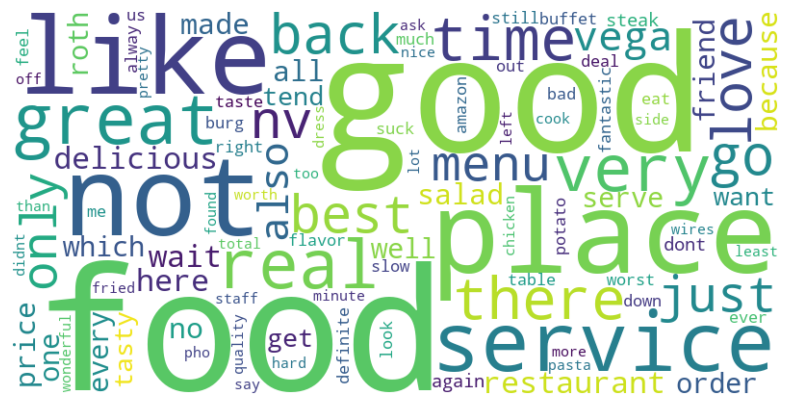

In [18]:
# Generate Wordcloud of Autocorrect Series
cleaned_df_tsv_labeled_wordcloud = eda.generate_wordcloud(cleaned_df_tsv_labeled["Autocorrected"], custom_stopwords=["will", "some", "came"])

In [19]:
# Summary Statistics of our Text Data
eda.text_summary_stats(cleaned_df_tsv, "Review No Stopwords")

{'document_stats': {'total_docs': 197, 'empty_docs': 0, 'unique_docs': 197},
 'length_stats': {'min_length': 5,
  'max_length': 111,
  'total_length': 8462,
  'char_count_mean': 42.954314720812185,
  'char_count_median': 35},
 'word_stats': {'avg_words_per_doc': 6.842639593908629,
  'total_words': 1348,
  'unique_words': 748,
  'avg_word_length': 5.423590504451038},
 'frequent_words': {'food': 27,
  'good': 25,
  'place': 21,
  'not': 20,
  'like': 17,
  'service': 16,
  'great': 15,
  'very': 13,
  'really': 12,
  'time': 10}}

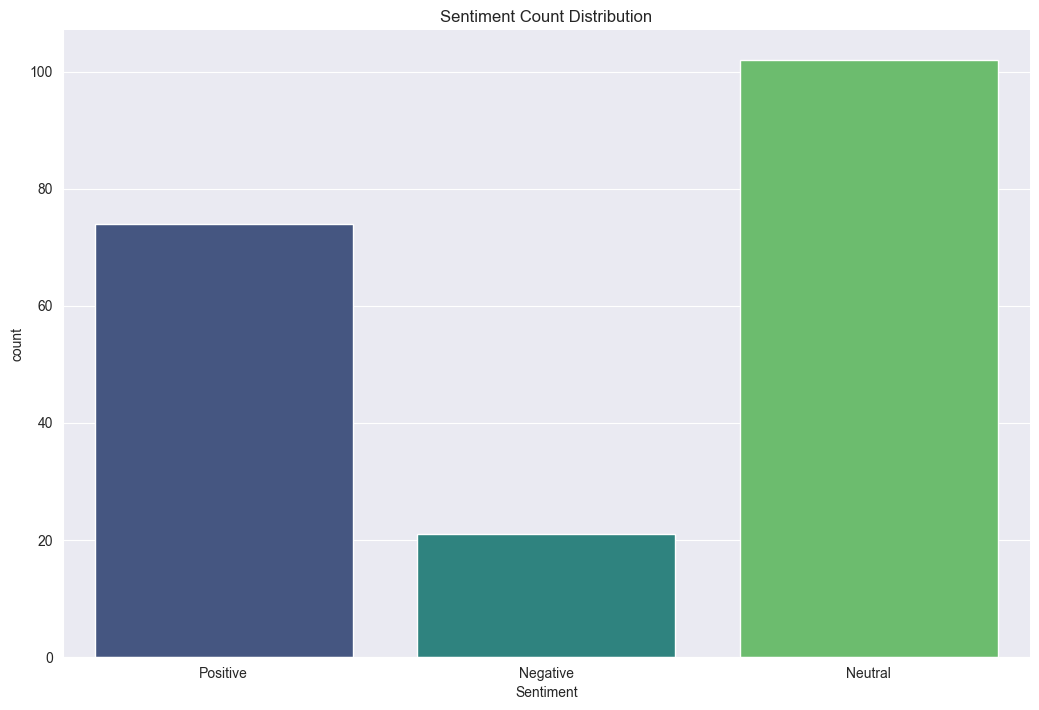

,review,like,Review No Stopwords,Autocorrected,Sentiment
0,wow loved this place,1.0,wow loved place,wow love place,Positive
1,crust isn't good,0.0,crust isn't good,crust isn't good,Negative
2,not tasty and the texture was just nasty,0.0,not tasty texture just nasty,not tasty texture just nasty,Negative
3,stopped by during the late may bank holiday of...,1.0,stopped during late may bank holiday off rick ...,stop during late may bank holiday off rick ste...,Positive
4,the selection on the menu was great and so wer...,1.0,selection menu great prices,select menu great price,Positive
...,...,...,...,...,...
192,when my order arrived one of the gyros was mis...,0.0,order arrived one gyros missing,word arrival one gyro miss,Neutral
193,i had a salad with the wings and some ice crea...,1.0,salad wings some ice cream dessert left feelin...,salad wing some ice cream dessert left feel qu...,Positive
194,i'm not really sure how joey's was voted best ...,0.0,i'm not really sure joey's voted best hot dog ...,i'm not real sure joe vote best hot dog valley...,Positive
195,the best place to go for a tasty bowl of pho,1.0,best place go tasty bowl pho,best place go tasty bowl pho,Positive


In [20]:
# Sentiment Distribution Graph
eda.plot_sentiment_distribution(cleaned_df_tsv_labeled, "Autocorrected")

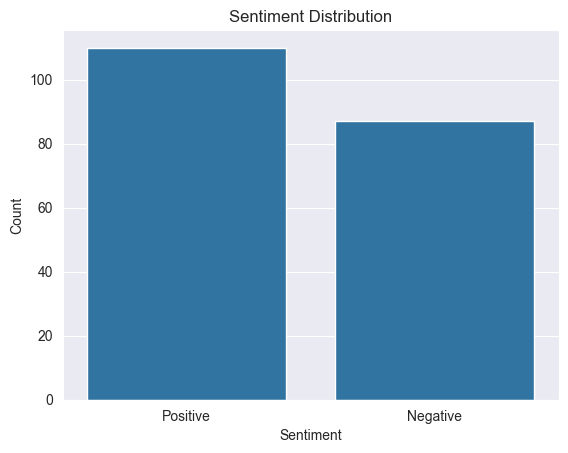

In [21]:
# Actual Sentiment
cleaned_df_tsv["like"] = cleaned_df_tsv["like"].astype(float)
cleaned_df_tsv["like"] = cleaned_df_tsv["like"].map({0.0: "Negative", 1.0: "Positive"})

sns.countplot(data=cleaned_df_tsv, x="like")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [22]:
different = cleaned_df_tsv_labeled[cleaned_df_tsv_labeled["like"] != cleaned_df_tsv_labeled["Sentiment"]]
display(different)

,review,like,Review No Stopwords,Autocorrected,Sentiment
6,honeslty it didn't taste that fresh,Negative,honeslty didn't taste fresh,honeslty didn't taste fresh,Neutral
7,the potatoes were like rubber and you could te...,Negative,potatoes like rubber tell made ahead time kept...,potato like rubber tell made ahead time kept warm,Positive
10,service was very prompt,Positive,service very prompt,service very prompt,Neutral
11,would not go back,Negative,not go back,not go back,Neutral
12,the cashier had no care what so ever on what i...,Negative,cashier no care ever say still ended wayyy ove...,cash no care ever say still end wayyy overpriced,Neutral
...,...,...,...,...,...
187,interesting decor,Positive,interesting decor,interest decor,Neutral
190,you can watch them preparing the delicious food,Positive,watch preparing delicious food,watch repair delicious food,Neutral
192,when my order arrived one of the gyros was mis...,Negative,order arrived one gyros missing,word arrival one gyro miss,Neutral
194,i'm not really sure how joey's was voted best ...,Negative,i'm not really sure joey's voted best hot dog ...,i'm not real sure joe vote best hot dog valley...,Positive


In [23]:
# Top Bi-Grams
eda.top_ngrams((cleaned_df_tsv_labeled[cleaned_df_tsv_labeled["Sentiment"] == "Neutral"]["Autocorrected"]), stopwords="food", n=2, top_k=10)

[(('go', 'back'), 4),
 (('little', 'slow'), 2),
 (('slow', 'service'), 2),
 (('found', 'place'), 2),
 (('honeslty', 'didnt'), 1),
 (('didnt', 'taste'), 1),
 (('taste', 'fresh'), 1),
 (('fresh', 'service'), 1),
 (('service', 'very'), 1),
 (('very', 'prompt'), 1)]

In [24]:
# Top Tri-Grams
eda.top_ngrams((cleaned_df_tsv_labeled[cleaned_df_tsv_labeled["Sentiment"] == "Neutral"]["Autocorrected"]), stopwords="food", n=3, top_k=10)

[(('honeslty', 'didnt', 'taste'), 1),
 (('didnt', 'taste', 'fresh'), 1),
 (('taste', 'fresh', 'service'), 1),
 (('fresh', 'service', 'very'), 1),
 (('service', 'very', 'prompt'), 1),
 (('very', 'prompt', 'not'), 1),
 (('prompt', 'not', 'go'), 1),
 (('not', 'go', 'back'), 1),
 (('go', 'back', 'cash'), 1),
 (('back', 'cash', 'no'), 1)]

In [25]:
cleaned_df_tsv_labeled = transform.label_data_sentiment(cleaned_df_tsv, "Autocorrected", new_column = "Custom Sentiment", custom_positive = {"tasty", "fresh" }, custom_negative = {"nasty", "angry", "no", "damn"}, negation_bigram=["taste", "tasty"])

cleaned_df_tsv_labeled.head()

,review,like,Review No Stopwords,Autocorrected,Sentiment,Custom Sentiment
0,wow loved this place,Positive,wow loved place,wow love place,Positive,Positive
1,crust isn't good,Negative,crust isn't good,crust isn't good,Negative,Negative
2,not tasty and the texture was just nasty,Negative,not tasty texture just nasty,not tasty texture just nasty,Negative,Negative
3,stopped by during the late may bank holiday of...,Positive,stopped during late may bank holiday off rick ...,stop during late may bank holiday off rick ste...,Positive,Positive
4,the selection on the menu was great and so wer...,Positive,selection menu great prices,select menu great price,Positive,Positive


In [26]:
different = cleaned_df_tsv_labeled[cleaned_df_tsv_labeled["like"] != cleaned_df_tsv_labeled["Custom Sentiment"]]
display(different)


,review,like,Review No Stopwords,Autocorrected,Sentiment,Custom Sentiment
7,the potatoes were like rubber and you could te...,Negative,potatoes like rubber tell made ahead time kept...,potato like rubber tell made ahead time kept warm,Positive,Positive
10,service was very prompt,Positive,service very prompt,service very prompt,Neutral,Neutral
11,would not go back,Negative,not go back,not go back,Neutral,Neutral
13,i tried the cape cod ravoli chicken with cranb...,Positive,tried cape cod ravoli chicken cranberrymmmm,tri cape cod ravoli chicken cranberrymmmm,Neutral,Neutral
14,i was disgusted because i was pretty sure that...,Negative,disgusted because pretty sure human hair,disgust because pretty sure human hair,Neutral,Neutral
...,...,...,...,...,...,...
187,interesting decor,Positive,interesting decor,interest decor,Neutral,Neutral
190,you can watch them preparing the delicious food,Positive,watch preparing delicious food,watch repair delicious food,Neutral,Neutral
192,when my order arrived one of the gyros was mis...,Negative,order arrived one gyros missing,word arrival one gyro miss,Neutral,Neutral
194,i'm not really sure how joey's was voted best ...,Negative,i'm not really sure joey's voted best hot dog ...,i'm not real sure joe vote best hot dog valley...,Positive,Positive


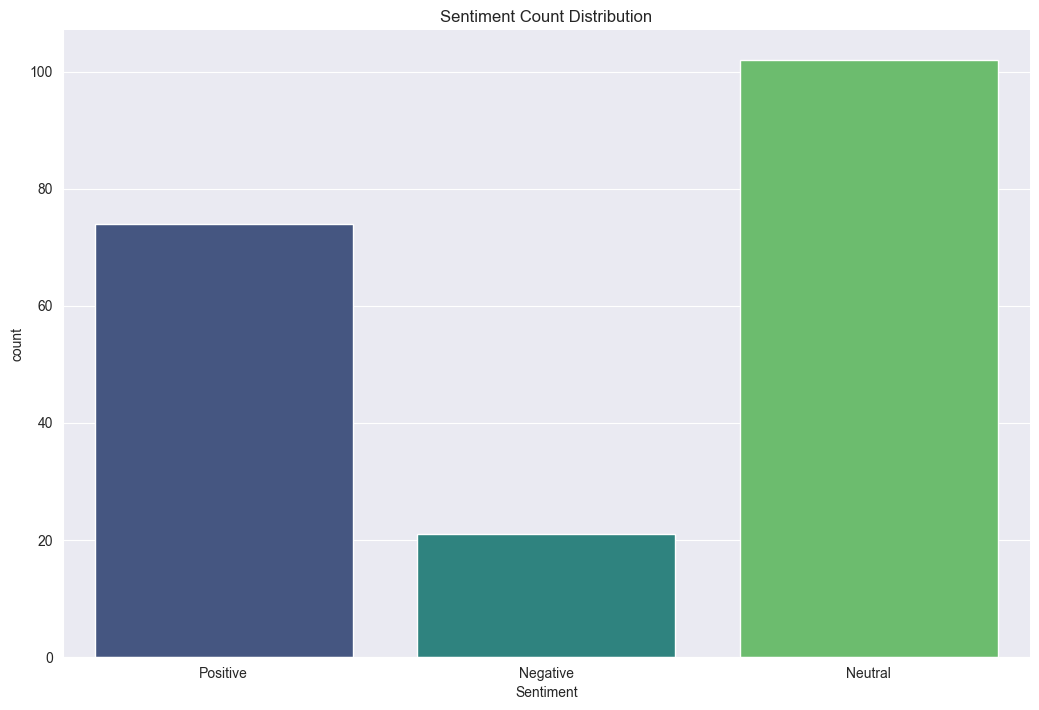

,review,like,Review No Stopwords,Autocorrected,Sentiment,Custom Sentiment
0,wow loved this place,Positive,wow loved place,wow love place,Positive,Positive
1,crust isn't good,Negative,crust isn't good,crust isn't good,Negative,Negative
2,not tasty and the texture was just nasty,Negative,not tasty texture just nasty,not tasty texture just nasty,Negative,Negative
3,stopped by during the late may bank holiday of...,Positive,stopped during late may bank holiday off rick ...,stop during late may bank holiday off rick ste...,Positive,Positive
4,the selection on the menu was great and so wer...,Positive,selection menu great prices,select menu great price,Positive,Positive
...,...,...,...,...,...,...
192,when my order arrived one of the gyros was mis...,Negative,order arrived one gyros missing,word arrival one gyro miss,Neutral,Neutral
193,i had a salad with the wings and some ice crea...,Positive,salad wings some ice cream dessert left feelin...,salad wing some ice cream dessert left feel qu...,Positive,Positive
194,i'm not really sure how joey's was voted best ...,Negative,i'm not really sure joey's voted best hot dog ...,i'm not real sure joe vote best hot dog valley...,Positive,Positive
195,the best place to go for a tasty bowl of pho,Positive,best place go tasty bowl pho,best place go tasty bowl pho,Positive,Positive


In [27]:
# Sentiment Distribution Graph
eda.plot_sentiment_distribution(cleaned_df_tsv_labeled, "Autocorrected")